In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

import pandas as pd
import seaborn as sb
import numpy as np

from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
data_train= pd.read_csv('data1.csv', sep=';') # načítanie datasetu
pd.set_option('display.max_columns', None) # zobrazenie všetkých stĺpcou
del data_train["koi_tce_delivname"] # odstránenie nepotrebných stĺpcou, v kotrých sú stringy alebo sú prázdne
del data_train["koi_teq_err1"]
del data_train["koi_teq_err2"]

data_train

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,1,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.1460,0.3180,-0.1460,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.5860,0.0590,-0.4430,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,0,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.9690,5.1260,-0.0770,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,0,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.6000,0.1150,-0.0920,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,1,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.7010,0.2350,-0.4780,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,1,1.000,0,0,0,0,11.094321,2.036000e-05,-2.036000e-05,171.201160,0.001410,-0.001410,0.5380,0.0300,-0.4280,4.59450,0.06100,-0.06100,1517.5,24.2,-24.2,3.90,1.27,-0.42,835.0,114.81,112.85,-36.70,66.5,1.0,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,1,1.000,0,0,0,0,4.134435,1.046000e-05,-1.046000e-05,172.979370,0.001900,-0.001900,0.7620,0.1390,-0.5320,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160.0,427.65,420.33,-136.70,40.2,2.0,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,1,0.992,0,0,0,0,2.566589,1.781000e-05,-1.781000e-05,179.554370,0.004610,-0.004610,0.7550,0.2120,-0.5230,2.42900,0.16500,-0.16500,226.5,16.8,-16.8,1.59,0.52,-0.17,1360.0,807.74,793.91,-258.20,15.0,3.0,6046.0,189.0,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,9,6721123,K00114.01,NaN,FALSE POSITIVE,0,0.000,0,1,1,0,7.361790,2.128000e-05,-2.128000e-05,132.250530,0.002530,-0.002530,1.1690,7.1330,-0.0440,5.02200,0.13600,-0.13600,233.7,5.8,-5.8,39.21,6.45,-9.67,1342.0,767.22,349.28,-365.49,47.7,1.0,6227.0,111.0,-124.0,3.986,0.182,-0.098,1.800,0.322,-0.483,298.86435,42.151569,12.660
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,1,1.000,0,0,0,0,16.068647,1.088000e-05,-1.088000e-05,173.621937,0.000517,-0.000517,0.0520,0.2620,-0.0520,3.53470,0.02410,-0.02410,4914.3,33.3,-33.3,5.76,0.22,-0.49,600.0,30.75,4.46,-6.66,161.9,1.0,5031.0,75.0,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [8]:
data_test= pd.read_csv('cumulative.csv', sep=',') # načítanie datasetu
pd.set_option('display.max_columns', None) # zobrazenie všetkých stĺpcou
del data_test["koi_tce_delivname"] # odstránenie nepotrebných stĺpcou, v kotrých sú stringy alebo sú prázdne
del data_test["koi_teq_err1"]
del data_test["koi_teq_err2"]

In [9]:
data_train = data_train.fillna(0) # NaN hodnoty su nahradene 0
data_X_Train = data_train.iloc[1000:7000,7:] # Vyberanie dát na trénovanie
data_Y_Train = data_train.iloc[1000:7000,5]

data_test = data_test.fillna(0)
data_X_Test = data_test.iloc[8000:9000,7:] # Vyberanie dát na testovanie
data_Y_Test = data_test.iloc[8000:9000,6]

Y_Train = to_categorical(data_Y_Train, num_classes = None) # Využitie metódy to_categorical na kategorickú premenu
Y_Test = to_categorical(data_Y_Test, num_classes = None)

In [13]:
model = Sequential()
model.add(Dense(20, input_dim=40, kernel_initializer="uniform", activation='tanh')) # Vstupná vrstva má 20 neurónov a aktivačnú funkciu tanh
model.add(Dense(40, kernel_initializer="uniform", activation='tanh')) # Skrytá vrstva má 40 neurónov a aktivačnú funkciu tanh
model.add(Dense(2, kernel_initializer="uniform", activation='softmax')) # Výstupná vrstva má 2 neuróny a aktivačnú funkciu softmax


model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) # Na kompliáciu modelu bol použitý optimizer Adam- dosahoval najväčšiu presnosť
learning = model.fit(data_X_Train,Y_Train, epochs=3000, batch_size=100, verbose=0)


scores = model.evaluate(data_X_Train,Y_Train)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

6000/6000 [==============================] - 0s 63us/step

Accuracy: 92.00%


In [ ]:
model.save('kepler-model.h5')

In [ ]:
#for layer in model.layers: print(layer.get_config(), layer.get_weights())

In [21]:
model.predict_classes(data_X_Test) # predikcia na testovacích dátach

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

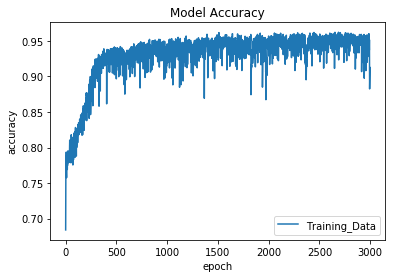

In [16]:
plt.plot(learning.history['acc']) # graf znázorňujúci presnosť modelu 
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training_Data'])
plt.show()

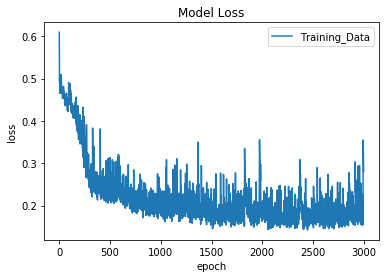

In [17]:
plt.plot(learning.history['loss']) # graf znázorňujúci straty
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_Data'])
plt.show()